In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def f(x):
    return (5*x + 3) 

X_train = [random.randint(0,50) for i in range(100)]
X_test = [random.randint(0,50) for i in range(100)]
y_train = [f(x) + random.randint(-10,10) for x in X_train]
y_test = [(f(x) + 3) + random.randint(-10,10) for x in X_test]

In [3]:
X_train = pd.DataFrame({'X':X_train})
X_test = pd.DataFrame({'X':X_test})

y_train = pd.DataFrame({'y':y_train})
y_test = pd.DataFrame({'y':y_test})

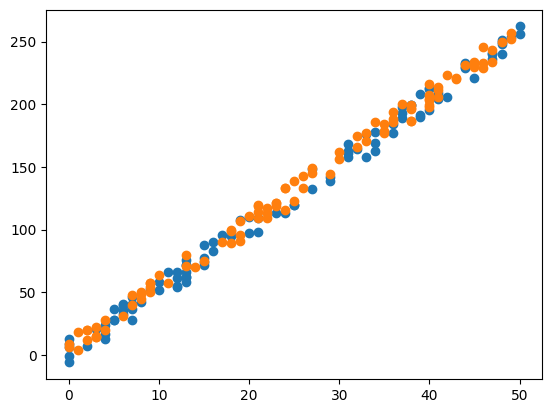

In [4]:
plt.scatter(X_train['X'],y_train['y'])
plt.scatter(X_test['X'],y_test['y'])
plt.show()

*** Random Forest ***
MAE = 7.1302637337662285
MAPE = 0.09394830511131466


c:\Users\marco\Dropbox\Code\JUPYTER\DSM2024\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


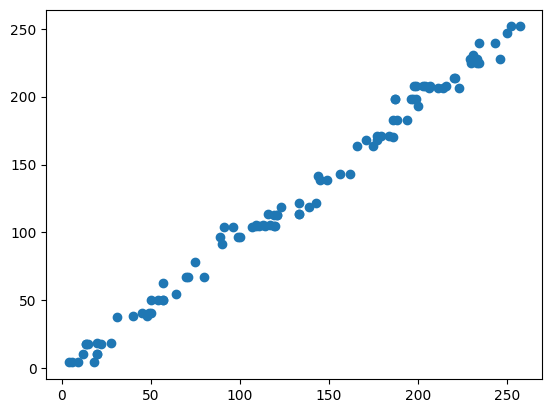

In [5]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print("*** Random Forest ***")
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()



*** KNN Regression ***
MAE = 6.4366666666666665
MAPE = 0.08726057521460362


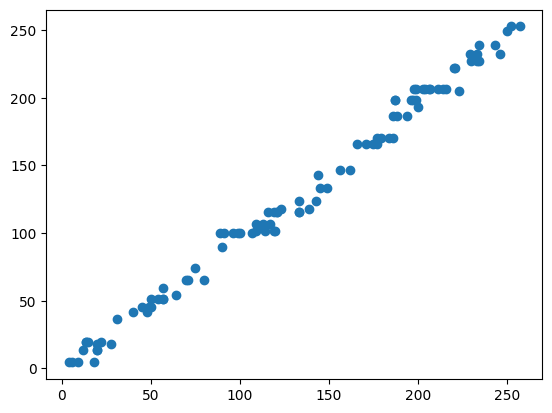

In [6]:
print("*** KNN Regression ***")
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

*** Linear Regression ***
MAE = 5.13591672521442
MAPE = 0.08705292262084653


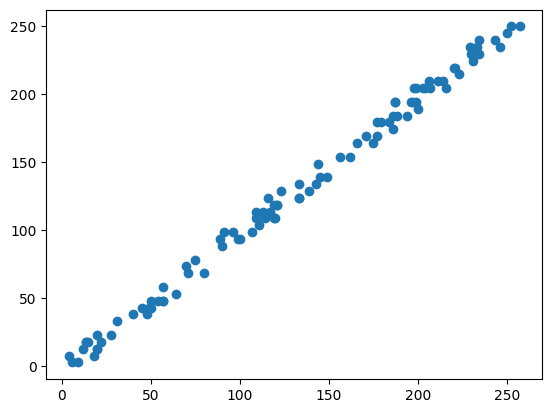

In [7]:
print("*** Linear Regression ***")
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.show()

In [8]:
y_test

,y
0,246
1,70
2,57
3,206
4,156
...,...
95,233
96,9
97,40
98,234


In [9]:
print('m=',clf.coef_)
print('q=',clf.intercept_)


m= [[5.05144359]]
q= [2.47741161]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Input

input_shape = (1,)
model = Sequential([
Input(shape=input_shape),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(1, activation="linear")
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,601 (119.54 KB)

 Trainable params: 30,601 (119.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.callbacks import EarlyStopping
model.compile(loss='mse', optimizer='adam')
es = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100)#, callbacks=[es])


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21072.0098  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20887.9824
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 19444.3359
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18509.8594
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17396.1816
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14341.2949
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 10917.6309
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6620.6113
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2675.3142  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 276.4113
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1002.7068
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1400.7303
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253.7115
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 82.7050
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

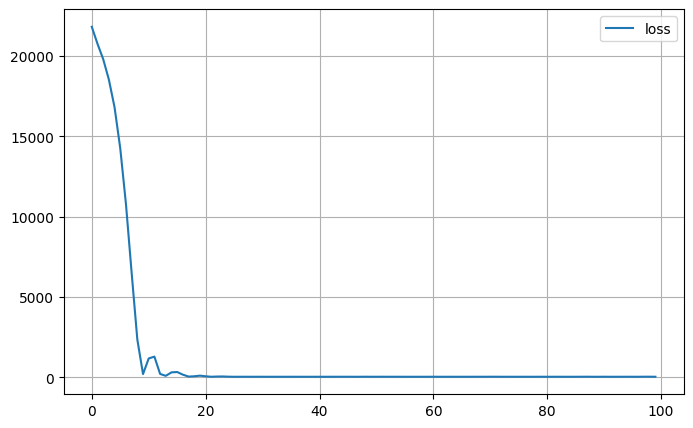

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [17]:
y_pred = model.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred))
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MAE = 4.826349382400513
MAPE = 0.08357254936959496
